# Model 4
# About Dataset
## Context : Predict behavior to retain customers.( Churn Or Not)
## Content : 
Each row represents a customer, each column contains customer’s attributes , The data set includes information about:

- Customers who left within the last month – the column is called Churn 
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Metadata:
   - customerID:Customer ID
   - gender:Whether the customer is a male or a female
   - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
   - Partner: Whether the customer has a partner or not (Yes, No)
   - Dependents: Whether the customer has dependents or not (Yes, No)
   - tenure:Number of months the customer has stayed with the company
   - PhoneService:Whether the customer has a phone service or not (Yes, No)
   - MultipleLines:Whether the customer has multiple lines or not (Yes, No, No phone service)
   - InternetService:Customer’s internet service provider (DSL, Fiber optic, No)
   - OnlineSecurity:Whether the customer has online security or not (Yes, No, No internet service)
   - OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
   - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
   - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
   - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
   - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
   - Contract: The contract term of the customer (Month-to-month, One year, Two year)
   - PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
   - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
   - MonthlyCharges: The amount charged to the customer monthly
   - TotalCharges : The total amount charged to the customer
   
   - Churn: Whether the customer churned or not (Yes or No)**Label**
   
## Requirements

**1- Load data and features are numerical ( discrete, continuous, or timeseries based ). (data Path =`WA_Fn-UseC_-Telco-Customer-Churn_3.csv`)**

**2-  Is data imbalance ? how many churned clients in data**

**3- Based on your observations from First requirement :**

   - Check Structural Errors in data and Handle it
   - Check outlier in continuous Features 
   - Check Missing values and Handle it

**4- Extract The Most important feature based on Mutual information**

**5- Use DecisionTreeClassifier to predict customer churned and show why your model can decide customer churn**

#### Hint: 
- you can consider any empty string as 0 value 
- you are free to apply any method to address any necessary data transformations and cleaning procedures

In [2]:
### imports ####
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif,f_classif,SelectKBest 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_3.csv')

# explore the data 

In [21]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   object 
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
index=0
for i in data.columns:
    print(index)
    index+1
    print(i)
    print(data[i].dtypes)
    print(data[i].unique())
    print(' ')

0
customerID
object
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
 
0
gender
object
['Female' 'Male']
 
0
SeniorCitizen
int64
[0 1]
 
0
Partner
object
['Yes' 'No']
 
0
Dependents
object
['No' 'Yes']
 
0
tenure
object
['1' '34' '2' '45' '8' '22' '10' '28' '62' '13' '16' '58' '49' '25' '69'
 '52' '71' '21' '12' '30' '47' '72' '17' '27' '5' '46' '11' '70' '63' '43'
 '15' '60' '18' '66' '9' '3' '31' '50' '64' '56' '7' '42' '35' '48' '29'
 '65' '38' '68' '32' '55' '37' '36' '41' '6' '4' '33' '67' '23' '57' '61'
 '14' '20' '53' '40' '59' '24' '44' '19' '54' '51' '26' ' ' '39']
 
0
PhoneService
object
['No' 'Yes']
 
0
MultipleLines
object
['No phone service' 'No' 'Yes']
 
0
InternetService
object
['DSL' 'Fiber optic' 'No']
 
0
OnlineSecurity
object
['No' 'Yes' 'No internet service']
 
0
OnlineBackup
object
['Yes' 'No' 'No internet service']
 
0
DeviceProtection
object
['No' 'Yes' 'No internet service']
 
0
TechSupport
object
['No' 'Yes' 'No internet serv

# data types 

In [25]:
# continuous
cont_feat = data.select_dtypes('float').columns
cont_feat


Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

In [20]:
# descrete
data.select_dtypes(int)

,SeniorCitizen,tenure
0,0,1
1,0,34
2,0,2
3,0,45
4,0,2
...,...,...
7038,0,24
7039,0,72
7040,0,11
7041,1,4


# handle structure

In [13]:
data = data.drop(data[data['tenure']==' '].index,axis=0)

In [14]:
data.shape

(7032, 21)

In [15]:
data['tenure'] = data['tenure'].astype(int)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int32  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Is data imbalance ? how many churned clients in data 

In [23]:
len(data[data['Churn']=='Yes'])

1869

# cheack the nan value 

In [24]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# cheack the outlier 

MonthlyCharges


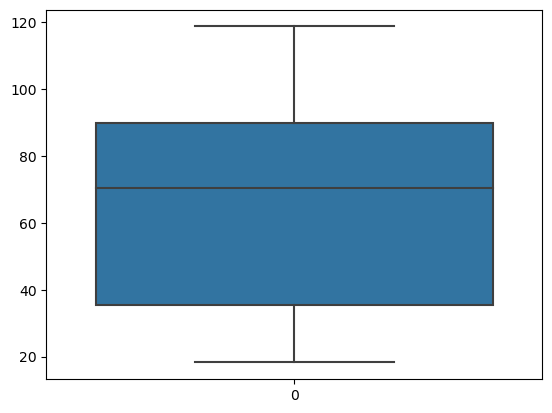

TotalCharges


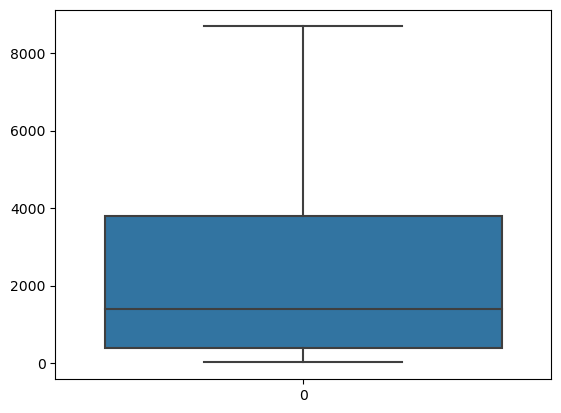

In [26]:
for i in cont_feat:
    print(i)
    sns.boxplot(data[i])
    plt.show()

# drop CustomerID and convert string to number 

In [ ]:
data = data.drop(columns='CustomerID',axis=1)

In [27]:
cate_feat = data.select_dtypes(object).columns

In [28]:
label_encoder = LabelEncoder()
for i in cate_feat:
    data[i]=label_encoder.fit_transform(data[i])

In [29]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


# mutual_info_classif 

In [30]:
mic = SelectKBest(score_func=mutual_info_classif,k=5)
x=data.drop(columns='Churn',axis=1)
y = data['Churn']
mic.fit(x,y)
score_F=pd.Series(mic.scores_,index=x.columns)
score_F.sort_values(ascending=False)

Contract            0.101623
tenure              0.072279
OnlineSecurity      0.066526
TechSupport         0.061107
OnlineBackup        0.056055
InternetService     0.046721
MonthlyCharges      0.045580
TotalCharges        0.044177
PaymentMethod       0.038638
DeviceProtection    0.037006
StreamingMovies     0.036703
PaperlessBilling    0.028194
StreamingTV         0.025070
Dependents          0.016342
SeniorCitizen       0.013606
Partner             0.013586
PhoneService        0.004380
customerID          0.004129
gender              0.002808
MultipleLines       0.000000
dtype: float64

#  DecisionTreeClassifier model

In [31]:
model = tree.DecisionTreeClassifier(random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7251184834123223